# Text Emotion Classification - Valentina/Varun Project Group 10 Code Naive Bayes + Neural Networks

In [1]:
def read_corpus(filename):
    
    all_data = []
    all_labels = []
    reviews = open(filename, 'r').readlines()
    for review in reviews:
        review = review.strip()
        
        split = review.split(";")
        
        all_data.append(split[0])
        all_labels.append(split[1])
    return all_data, all_labels

In [2]:
train_data, train_labels = read_corpus('train.txt')

In [3]:
test_data, test_labels = read_corpus('test.txt')

In [4]:
val_data, val_labels = read_corpus('val.txt')

## Naive Bayes

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def trainTest(train_data, test_data, train_labels, test_labels):
    model_fit = make_pipeline(TfidfVectorizer(), MultinomialNB())
    model_fit.fit(train_data, train_labels)
    predictions = model_fit.predict(test_data)
    matrix = confusion_matrix(y_true=test_labels, y_pred=predictions, labels=model_fit.classes_)
    return matrix, model_fit, predictions

In [7]:
matrix, model_fit, predictions = trainTest(train_data, test_data, train_labels, test_labels)
matrix

array([[ 45,   0, 127,   0, 103,   0],
       [  2,  41,  93,   0,  88,   0],
       [  0,   0, 686,   0,   9,   0],
       [  0,   0, 127,   4,  28,   0],
       [  0,   0,  60,   0, 521,   0],
       [  0,   0,  42,   0,  24,   0]])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def confusionHeatmap(matrix, labels):
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label');

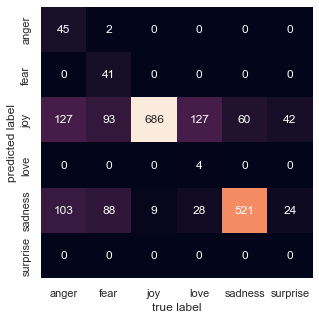

In [9]:
confusionHeatmap(matrix, model_fit.classes_)

In [10]:
from sklearn.metrics import f1_score

def calculateMicroMacroF1(true, pred):
    micro = f1_score(true, pred, average='micro')
    macro = f1_score(true, pred, average='macro')
    return micro, macro

In [11]:
micro_cat, macro_cat = calculateMicroMacroF1(test_labels, predictions)

In [12]:
print("Microaveraged F1 score for category predictions " + str(micro_cat))
print("Macroaveraged F1 score for category predictions " + str(macro_cat))

Microaveraged F1 score for category predictions 0.6485
Macroaveraged F1 score for category predictions 0.35955253966635575


## Neural Network Basic Architecture

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

mlp = MLPClassifier(hidden_layer_sizes=(50,), verbose=True, early_stopping=True)
model_cat = make_pipeline(TfidfVectorizer(), mlp)
model_cat.fit(train_data, train_labels).score(train_data, train_labels)

Iteration 1, loss = 1.69330616
Validation score: 0.543750
Iteration 2, loss = 1.36798520
Validation score: 0.578750
Iteration 3, loss = 1.05652440
Validation score: 0.690625
Iteration 4, loss = 0.73640417
Validation score: 0.778750
Iteration 5, loss = 0.49670159
Validation score: 0.825625
Iteration 6, loss = 0.34423464
Validation score: 0.842500
Iteration 7, loss = 0.25010059
Validation score: 0.855625
Iteration 8, loss = 0.19056473
Validation score: 0.860000
Iteration 9, loss = 0.15092094
Validation score: 0.863125
Iteration 10, loss = 0.12331768
Validation score: 0.866875
Iteration 11, loss = 0.10320769
Validation score: 0.868125
Iteration 12, loss = 0.08812676
Validation score: 0.868125
Iteration 13, loss = 0.07631970
Validation score: 0.861875
Iteration 14, loss = 0.06675634
Validation score: 0.864375
Iteration 15, loss = 0.05907251
Validation score: 0.863750
Iteration 16, loss = 0.05277413
Validation score: 0.863750
Iteration 17, loss = 0.04739879
Validation score: 0.864375
Iterat

0.9775625

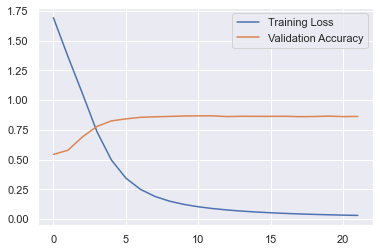

In [101]:
pred_labels_cat = model_cat.predict(val_data)
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.plot(mlp.validation_scores_, label="Validation Accuracy")
plt.legend()

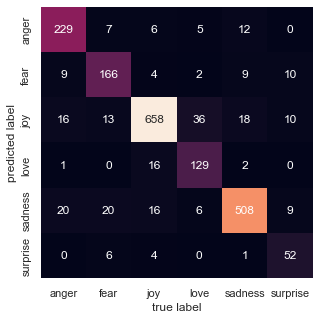

In [103]:
matrix = confusion_matrix(y_true = val_labels, y_pred = pred_labels_cat, labels = clf.classes_)
plt.figure(figsize=(5,5))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [104]:
micro_cat, macro_cat = calculateMicroMacroF1(val_labels, pred_labels_cat)
print("Microaveraged F1 score for category predictions " + str(micro_cat))
print("Macroaveraged F1 score for category predictions " + str(macro_cat))

Microaveraged F1 score for category predictions 0.871
Macroaveraged F1 score for category predictions 0.8302525317499684


In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(val_labels, pred_labels_cat)

0.871

## Neural Network 2 - Complex architecture w/ regularization + more layers & units

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100), alpha=0.01, max_iter=500, early_stopping=True, verbose=True, n_iter_no_change=50)
model_cat2 = make_pipeline(TfidfVectorizer(), mlp)
model_cat2.fit(train_data, train_labels).score(train_data, train_labels)


Iteration 1, loss = 1.48451732
Validation score: 0.573125
Iteration 2, loss = 0.67632199
Validation score: 0.776875
Iteration 3, loss = 0.23576474
Validation score: 0.824375
Iteration 4, loss = 0.08693346
Validation score: 0.828125
Iteration 5, loss = 0.05223248
Validation score: 0.832500
Iteration 6, loss = 0.03791701
Validation score: 0.824375
Iteration 7, loss = 0.03317445
Validation score: 0.830000
Iteration 8, loss = 0.02964354
Validation score: 0.828125
Iteration 9, loss = 0.02729677
Validation score: 0.825000
Iteration 10, loss = 0.02789270
Validation score: 0.828125
Iteration 11, loss = 0.02541297
Validation score: 0.821250
Iteration 12, loss = 0.02474797
Validation score: 0.832500
Iteration 13, loss = 0.02408665
Validation score: 0.833125
Iteration 14, loss = 0.02296083
Validation score: 0.834375
Iteration 15, loss = 0.02279641
Validation score: 0.828125
Iteration 16, loss = 0.02338300
Validation score: 0.836250
Iteration 17, loss = 0.02104322
Validation score: 0.829375
Iterat

Iteration 140, loss = 0.01426691
Validation score: 0.849375
Iteration 141, loss = 0.01394584
Validation score: 0.850000
Iteration 142, loss = 0.01388528
Validation score: 0.850625
Iteration 143, loss = 0.01401764
Validation score: 0.846875
Iteration 144, loss = 0.01387104
Validation score: 0.849375
Iteration 145, loss = 0.01364659
Validation score: 0.845000
Iteration 146, loss = 0.01363727
Validation score: 0.846250
Iteration 147, loss = 0.01417588
Validation score: 0.850000
Iteration 148, loss = 0.01443369
Validation score: 0.843750
Iteration 149, loss = 0.01425592
Validation score: 0.847500
Iteration 150, loss = 0.01846749
Validation score: 0.829375
Iteration 151, loss = 0.03805181
Validation score: 0.806875
Iteration 152, loss = 0.04058363
Validation score: 0.837500
Iteration 153, loss = 0.02525105
Validation score: 0.835625
Iteration 154, loss = 0.01983062
Validation score: 0.831875
Iteration 155, loss = 0.01834848
Validation score: 0.836250
Iteration 156, loss = 0.01786024
Validat

0.984625

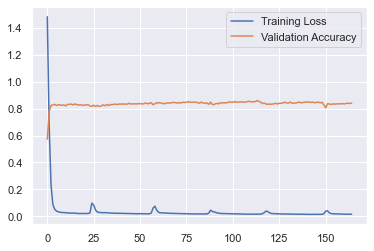

In [20]:
pred_labels_cat2 = model_cat2.predict(val_data)
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.plot(mlp.validation_scores_, label="Validation Accuracy")
plt.legend()

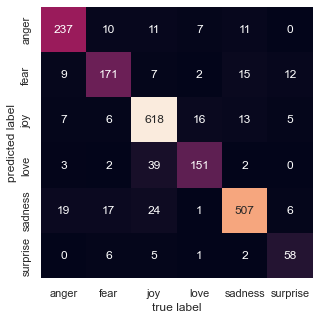

In [21]:
matrix = confusion_matrix(y_true = val_labels, y_pred = pred_labels_cat2, labels = model_cat2.classes_)
plt.figure(figsize=(5,5))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=model_cat2.classes_, yticklabels=model_cat2.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [22]:
micro_cat, macro_cat = calculateMicroMacroF1(val_labels, pred_labels_cat2)
print("Microaveraged F1 score for category predictions " + str(micro_cat))
print("Macroaveraged F1 score for category predictions " + str(macro_cat))

Microaveraged F1 score for category predictions 0.871
Macroaveraged F1 score for category predictions 0.8379677996794316


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(val_labels, pred_labels_cat2)

0.871

### Applying neural network 2 to test data

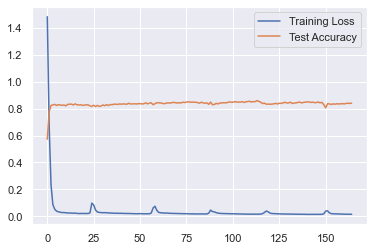

In [24]:
pred_labels_cat2 = model_cat2.predict(test_data)
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.plot(mlp.validation_scores_, label="Test Accuracy")
plt.legend()

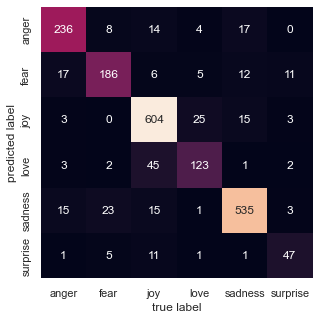

In [25]:
matrix = confusion_matrix(y_true = test_labels, y_pred = pred_labels_cat2, labels = model_cat2.classes_)
plt.figure(figsize=(5,5))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=model_cat2.classes_, yticklabels=model_cat2.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels_cat2)

0.8655

In [27]:
micro_cat, macro_cat = calculateMicroMacroF1(test_labels, pred_labels_cat2)
print("Microaveraged F1 score for category predictions " + str(micro_cat))
print("Macroaveraged F1 score for category predictions " + str(macro_cat))

Microaveraged F1 score for category predictions 0.8655
Macroaveraged F1 score for category predictions 0.8192847981416026


## Neural Network 3 - Glove embeddings + OOV dictionary

In [5]:
def calc_doc_embedding(doc, embeddings, embed_size, OOV_embed):
    word_count = 0
    doc_embed = np.zeros(embed_size, dtype=float)
    for word in doc.split():
        if word not in stopset:
            if (word in embeddings):
                word_embedding = embeddings[word]
            elif word in OOV_embed:
                word_embedding = OOV_embed[word]
            else:
                word_embedding = np.random.random(embed_size)
                OOV_embed[word] = word_embedding
            doc_embed += word_embedding
            word_count += 1
    doc_embed /= word_count
    return doc_embed

In [6]:
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.corpus import stopwords
import string

stopset = stopwords.words('english') + list(string.punctuation)

glove_file = datapath('/Users/varunkrishnan/Documents/school/STATSOFTWARE577/glove.6B.50d.txt')
word2vec_text_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_text_file)

model = KeyedVectors.load_word2vec_format(word2vec_text_file)

OOV_embed = {}
train_data_embed = np.vstack([calc_doc_embedding(doc, model, 50, OOV_embed) for doc in train_data])
val_data_embed = np.vstack([calc_doc_embedding(doc, model, 50, OOV_embed) for doc in val_data])


/Users/varunkrishnan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  if sys.path[0] == '':


In [7]:
print(len(OOV_embed))

1102


In [42]:
model_cat_embed = MLPClassifier(hidden_layer_sizes=(600,400,100,50), alpha=0.001, max_iter=500, early_stopping=True, verbose=True,n_iter_no_change=50)
model_cat_embed.fit(train_data_embed, train_labels).score(train_data_embed, train_labels)

Iteration 1, loss = 1.38598388
Validation score: 0.501250
Iteration 2, loss = 1.25021369
Validation score: 0.530625
Iteration 3, loss = 1.20048909
Validation score: 0.540000
Iteration 4, loss = 1.16535061
Validation score: 0.537500
Iteration 5, loss = 1.13368971
Validation score: 0.535625
Iteration 6, loss = 1.10191054
Validation score: 0.554375
Iteration 7, loss = 1.07948905
Validation score: 0.545625
Iteration 8, loss = 1.04742708
Validation score: 0.560625
Iteration 9, loss = 1.02408085
Validation score: 0.569375
Iteration 10, loss = 0.98586219
Validation score: 0.564375
Iteration 11, loss = 0.96023138
Validation score: 0.561875
Iteration 12, loss = 0.92827353
Validation score: 0.558125
Iteration 13, loss = 0.88989010
Validation score: 0.563750
Iteration 14, loss = 0.86817782
Validation score: 0.566250
Iteration 15, loss = 0.83079610
Validation score: 0.566250
Iteration 16, loss = 0.78969210
Validation score: 0.560625
Iteration 17, loss = 0.74781022
Validation score: 0.557500
Iterat

0.6249375

In [43]:
pred_labels_cat_embed = model_cat_embed.predict(val_data_embed)


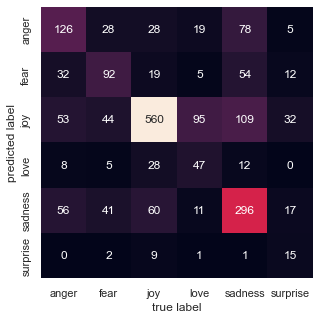

In [44]:
matrix = confusion_matrix(y_true = val_labels, y_pred = pred_labels_cat_embed, labels = model_cat_embed.classes_)
plt.figure(figsize=(5,5))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=model_cat_embed.classes_, yticklabels=model_cat_embed.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(val_labels, pred_labels_cat_embed)

0.568